In [1]:
%matplotlib inline

In [2]:
import os,sys
import time
from matplotlib import pyplot as plt
import numpy as np
sys.path.insert(0, os.path.abspath('../src'))
from interface import Detector, Run
from visualizer import show_image, show_components
from embedding import batch_PCA, run_PCA

# Some useful experiment information
## General experiment setup:

In [3]:
expt='cxic0415'

In [4]:
geom_file = f'/cds/data/psdm/cxi/{expt}/calib/CsPad::CalibV1/CxiDs1.0:Cspad.0/geometry/0-end.data'

In [5]:
det = Detector(geom_file)

## some run specifics

In [6]:
run_idx=36

In [7]:
run = Run(expt, run_idx, det=det, image_type=np.int16)

9158 images of shape 1738x1747 and type int16
Estimated size: 55.61 GB


# PCA of a small batch

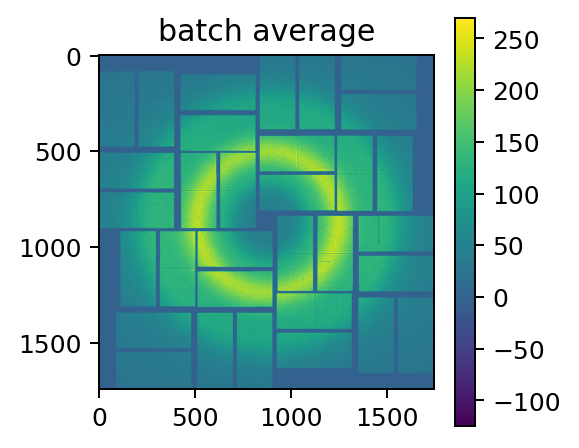

In [26]:
images = run._retrieve_image_batch(batch_size=10)
show_image(np.mean(images,axis=0), title='batch average')

PCA> fit in 2.89 s
PCA> components transformed in 0.46 s


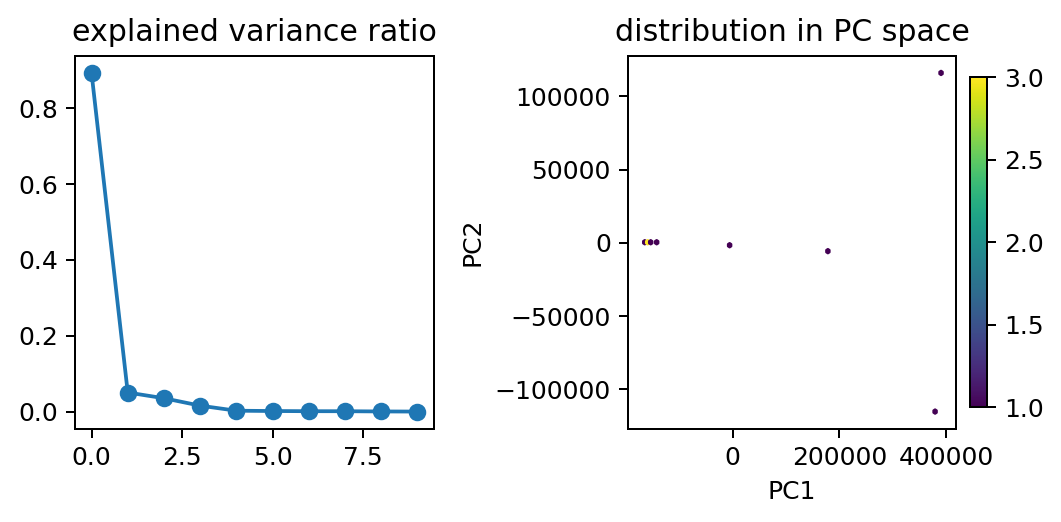

In [27]:
pca = batch_PCA(images)
show_components(pca)

PCA> eigenimages computed in 0.38 s


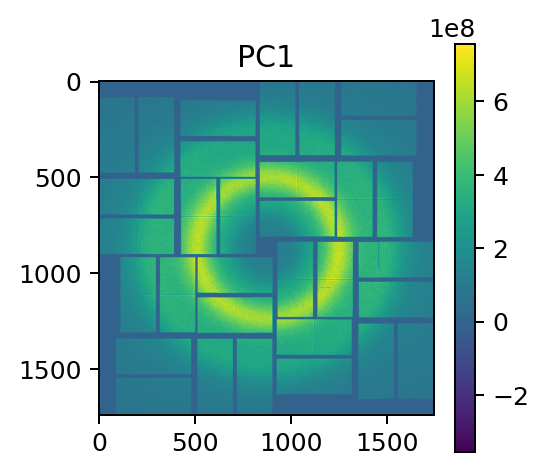

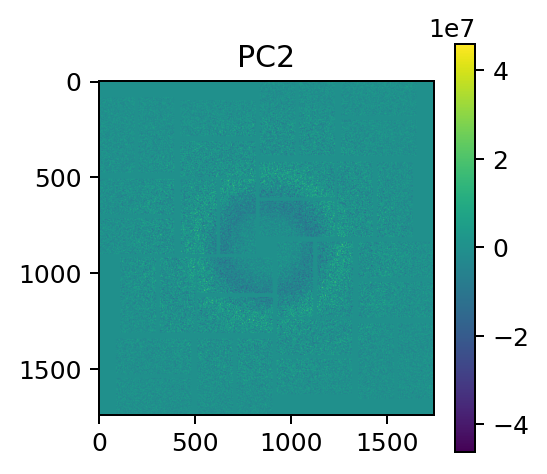

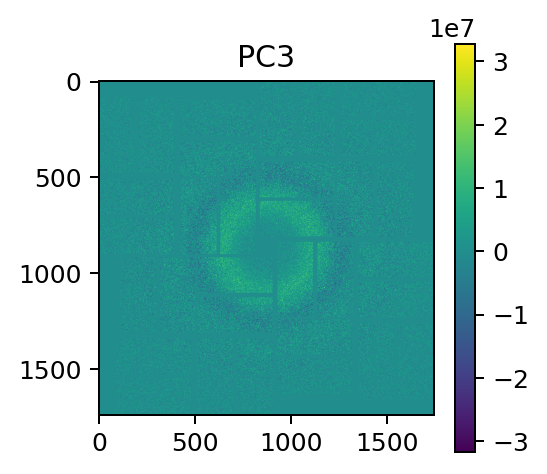

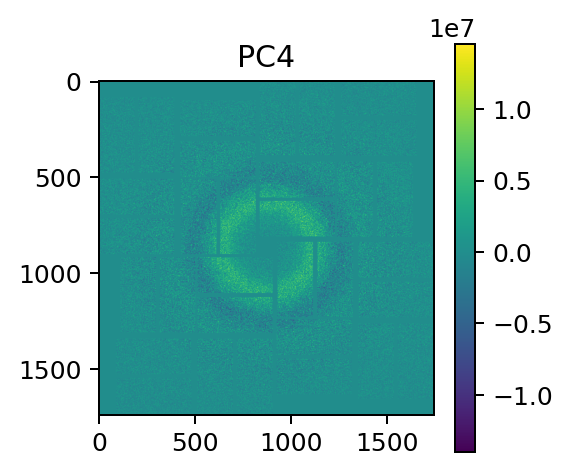

In [29]:
eigenimages = pca._compute_eigenimages()
for i in range(4):
    show_image(eigenimages[i,...], title=f'PC{i+1}')

# PCA of the whole run

In [9]:
pca = run_PCA(expt, run_idx, det=det, image_type=np.int16)

9158 images of shape 1738x1747 and type int16
Estimated size: 55.61 GB


In [ ]:
pca._compute_components()

  0%|          | 0/45 [00:00<?, ?it/s]

> batch loaded in 20.19 s


In [ ]:
#pca._compute_eigenimages()
#for i in range(4):
#    show_image(eigenimages[i,...], title=f'PC{i+1}')

In [ ]:
fig = plt.figure(figsize=(4,4),dpi=180)
plt.plot(pca.components[:,0], 'k.')
plt.xlabel('event #')
plt.ylabel('projection on PC1')
plt.show()